In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Data & Preprocessing

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Train.csv')
train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
training_set = train.iloc[:, 1: 2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
x_train = list([])
y_train = list([])

In [ ]:
x_train = []
y_train = []
for i in range(50, len(training_set_scaled)):
    x_train.append(training_set_scaled[i-50: i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(1208, 50)

In [ ]:
x_train[0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481])

In [ ]:
y_train.shape

(1208,)

In [ ]:
x_train = np.reshape(x_train, newshape = (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train.shape

(1208, 50, 1)

In [ ]:
x_train[0]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259],
       [0.0614257 ],
       [0.07474514],
       [0.02797827],
       [0.02379269],
       [0.02409033],
       [0.0159238 ],
       [0.01078949],
       [0.00967334],
       [0.01642607],
       [0.02100231],
       [0.02280676],
       [0.02273235],
       [0.02810849],
       [0.03212665],
       [0.0433812 ],
       [0.04475779],
       [0.04790163],
       [0.0440695 ],
       [0.04648783],
       [0.04745517],
       [0.04873875],
       [0.03936305],
       [0.04137213],
       [0.04034898],
       [0.04784582],
       [0.04325099],
       [0.04356723],
       [0.04286033],
       [0.04602277],
       [0.05398467],
       [0.05738894],
       [0.05714711],
       [0.05569611],
       [0.04421832],
       [0.04514845],
       [0.04605997],
       [0.04412531],
       [0.036

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Test.csv')
test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [ ]:
real_stock_price = test.iloc[:, 1: 2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [ ]:
dataset_total = pd.concat((train['Open'],test['Open']), axis = 0)
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [ ]:
inputs = dataset_total[len(dataset_total)-len(test)- 50: ].values
inputs

array([803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  , 808.35, 795.47,
       782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 , 779.94, 791.17,
       756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37, 762.61, 772.63,
       767.73, 764.26, 760.  , 771.53, 770.07, 757.44, 744.59, 757.71,
       764.73, 761.  , 772.48, 780.  , 785.04, 793.9 , 797.4 , 797.34,
       800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 , 790.68, 793.7 ,
       783.33, 782.75, 778.81, 788.36, 786.08, 795.26, 806.4 , 807.86,
       805.  , 807.14, 807.48, 807.08, 805.81, 805.12, 806.91, 807.25,
       822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [ ]:
len(inputs)

70

In [ ]:
inputs = inputs.reshape(-1, 1)
len(inputs)

70

In [ ]:
inputs = sc.transform(inputs)

In [ ]:
x_test = []
for i in range(50, len(inputs)): 
    x_test.append(inputs[i-50: i, 0])
x_test = np.array(x_test)
#make numpy array as 3D , adding num of indicator
x_test = np.reshape(x_test, newshape = (x_test.shape[0],x_test.shape[1], 1))

In [ ]:
x_test.shape

(20, 50, 1)

# Simple RNN

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.SimpleRNN(units=50, input_shape=(50,1), activation="relu"))
model1.add(tf.keras.layers.Dense(30, activation="relu")) 
model1.add(tf.keras.layers.Dense(15, activation="relu"))
model1.add(tf.keras.layers.Dense(8, activation="relu"))
model1.add(tf.keras.layers.Dense(1))
model1.compile(loss='mean_squared_error', optimizer='rmsprop')
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 30)                1530      
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 8)                 128       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,732
Trainable params: 4,732
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(x=x_train, y=y_train, batch_size=32, epochs=100)

Epoch 1/100
38/38 [==============================] - 7s 63ms/step - loss: 0.0613
Epoch 2/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0039
Epoch 3/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0027
Epoch 4/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0022
Epoch 5/100
38/38 [==============================] - 1s 31ms/step - loss: 0.0019
Epoch 6/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0016
Epoch 7/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0017
Epoch 8/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0014
Epoch 9/100
38/38 [==============================] - 1s 29ms/step - loss: 0.0015
Epoch 10/100
38/38 [==============================] - 1s 29ms/step - loss: 0.0014
Epoch 11/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0011
Epoch 12/100
38/38 [==============================] - 1s 31ms/step - loss: 9.7918e-04
Epoch 13/100
38/38 [=

# LSTM Model

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model2.add(tf.keras.layers.Dropout(rate = 0.2))
model2.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
model2.add(tf.keras.layers.Dropout(rate = 0.2))
model2.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
model2.add(tf.keras.layers.Dropout(rate = 0.2))
model2.add(tf.keras.layers.LSTM(units = 50, return_sequences = False))
model2.add(tf.keras.layers.Dropout(rate = 0.2))
model2.add(tf.keras.layers.Dense(units = 1))
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)               

In [ ]:
history2 = model2.fit(x = x_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
38/38 [==============================] - 11s 16ms/step - loss: 0.0410
Epoch 2/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0063
Epoch 5/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0044
Epoch 13/100
38/38 [====

# Performance

In [ ]:
predicted1 = model1.predict(x_test)
predicted2 = model2.predict(x_test)

1/1 [==============================] - 2s 2s/step


In [ ]:
predicted1 = sc.inverse_transform(predicted1)
predicted2 = sc.inverse_transform(predicted2)

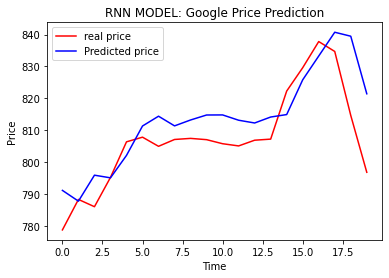

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'real price')
plt.plot(predicted1, color = 'blue', label ='Predicted price')
plt.title('RNN MODEL: Google Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

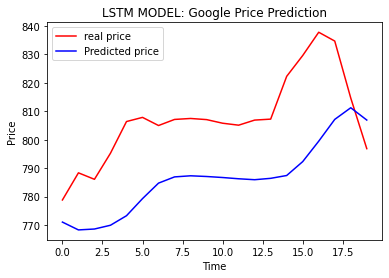

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'real price')
plt.plot(predicted2, color = 'blue', label ='Predicted price')
plt.title('LSTM MODEL: Google Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()